In [152]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm
import matplotlib.pyplot as plt


In [125]:
df = pd.read_csv("temperatures.csv")

In [126]:
# Convert df to datetime
df.ds = pd.to_datetime(df.ds)
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [127]:
# Find missing date_range in TS data
full_range = pd.date_range(start = "1980-01-01", end = "2012-12-01", freq='MS')
#full_range.difference(df.ds)

df.set_index('ds', inplace=True)
df = df.reindex(full_range)
df = df.fillna(method='ffill')

In [128]:
# Reset the index
df['ds'] = df.index
df.reset_index(drop=True, inplace=True)
df = df[['ds', 'y']]

In [129]:
df_model = df.copy()
df_model.set_index('ds', inplace=True)
train = df_model[:-24]
test = df_model[-24:]

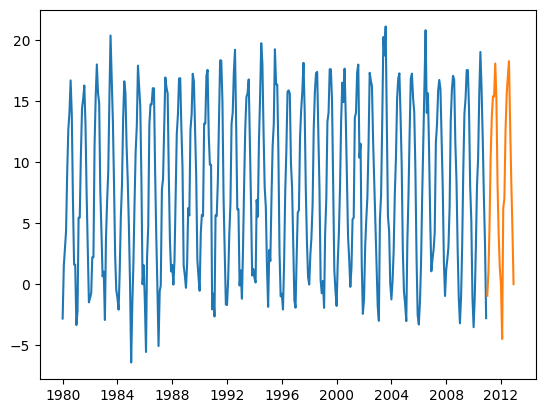

In [130]:
plt.plot(train)
plt.plot(test)

### Arima Model

In [109]:
adf_test = pm.arima.ADFTest(alpha = 0.05)
adf_test.should_diff(df_arima)

(0.01, False)

In [131]:
ar = pm.auto_arima(train)
pred_ar = pd.DataFrame(ar.predict(n_periods=24), index=test.index, columns=test.columns)

### Exponential Smoothning

In [146]:
ets = SimpleExpSmoothing(train)
model_fit = ets.fit()

pred_ets = pd.DataFrame(model_fit.forecast(24), index=test.index, columns=test.columns)

c:\Users\Neelam\Documents\Data_Science_2022\Deep_learning\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Prophet

In [150]:
train_prophet = df[:-24]
test_prophet = df[-24:]

In [153]:
prophet = Prophet()
prophet.fit(train_prophet)

13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:37 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
future_dates = prophet.make_future_dataframe(periods=24, freq = 'MS')
pred_prophet = prophet.predict(future_dates)

In [174]:
pred_prophet = pred_prophet[['ds', 'yhat']][-24:]
pred_prophet.set_index('ds', inplace=True)

In [187]:
temp = pd.concat([pred_ar.rename({'y':'arima'}, axis=1), pred_prophet.rename({'yhat':'prophet'}, axis=1), pred_ets.rename({'y':'ex_smooth'}, axis=1)], axis=1)

In [188]:
temp

,arima,prophet,ex_smooth
ds,,,
2011-01-01,-2.240679,-0.838311,-2.814
2011-02-01,-0.430901,0.082721,-2.814
2011-03-01,3.376379,3.879654,-2.814
2011-04-01,8.613398,6.870054,-2.814
2011-05-01,13.672313,11.259609,-2.814
2011-06-01,16.915128,14.957484,-2.814
2011-07-01,17.771338,18.224807,-2.814
2011-08-01,16.005852,16.870307,-2.814
2011-09-01,12.064219,14.135868,-2.814
